In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Airline_Delay_Cause.csv')

# Function for checking the missing values in the data


In [3]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing values in each column:")
    print(missing_values)

In [4]:
values = check_missing_values(df)
print(values)

Missing values in each column:
year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64
None


# Now handling the missing values in the data. We will use the fillna() function to fill the missing values in the data. We can fill the missing values with the mean, median, or mode of the column. We can also fill the missing values with a specific value. In this case, we will fill the missing values with the mean of the column.

In [5]:
def fill_missing_values(df) -> pd.DataFrame:
    for col in df.columns:
        x = df[col]
        if x.dtype in ['int64', 'float64']:
            x.fillna(x.mean(), inplace=True)
        else:
            x.fillna(x.mode()[0], inplace=True)
    return df

In [6]:
filled = fill_missing_values(df)
print(check_missing_values(filled))

Missing values in each column:
year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64
None


In [19]:
def boxenplot(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        sns.boxenplot(x=df[col])
        plt.title(f"Boxplot for {col}")
        plt.show()

        

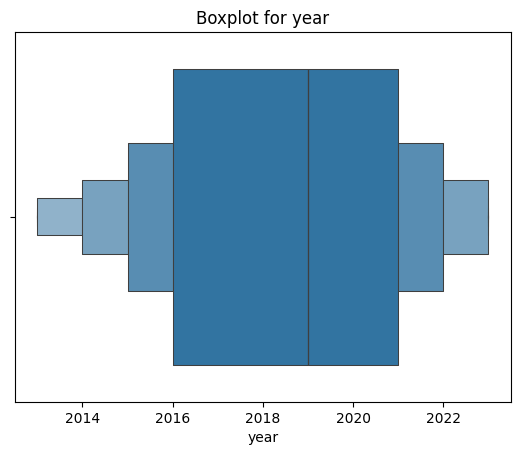

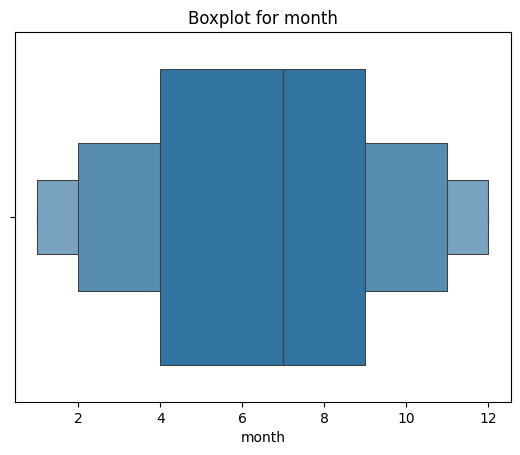

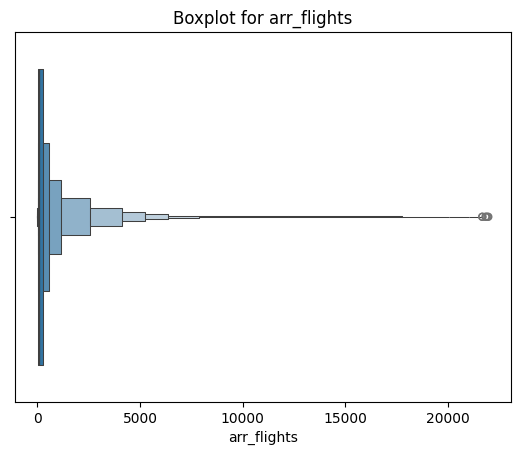

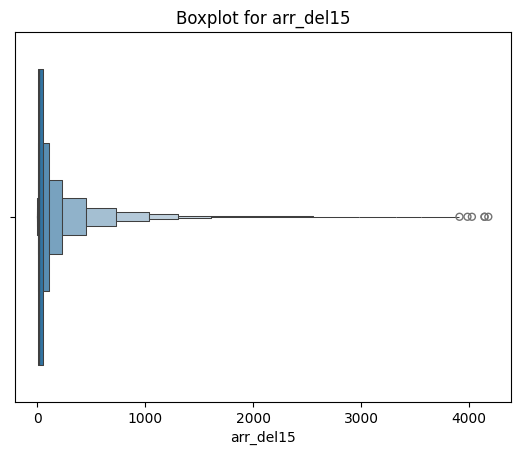

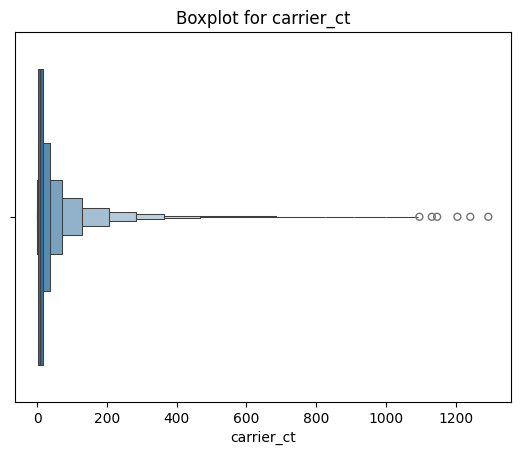

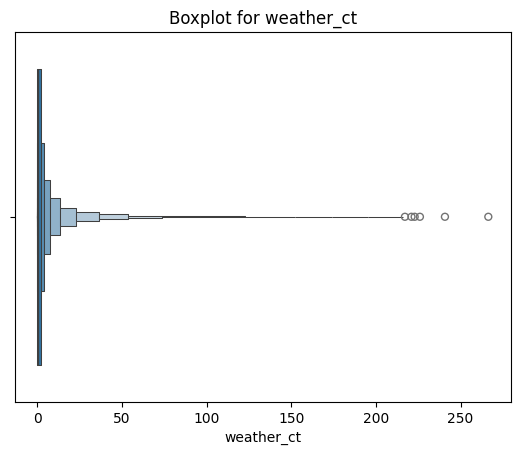

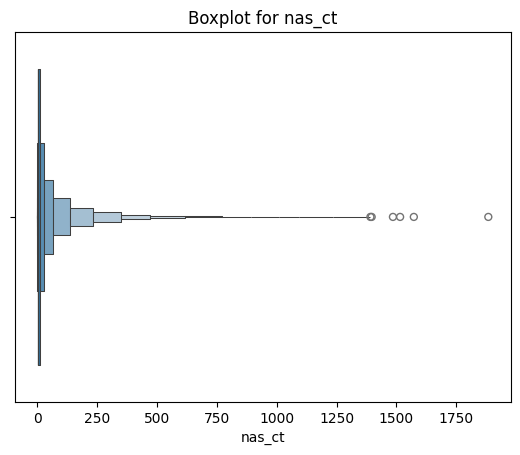

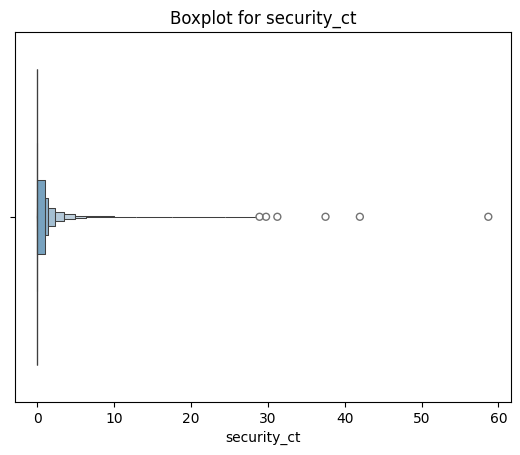

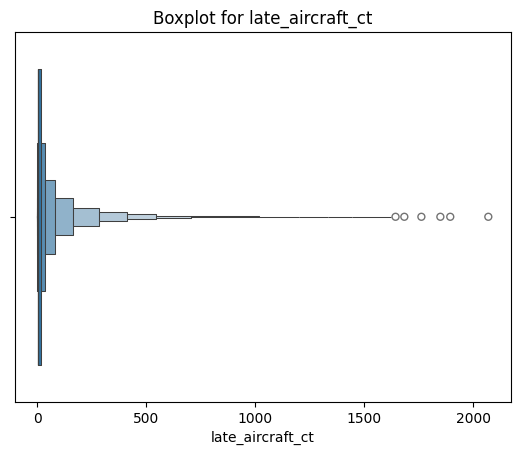

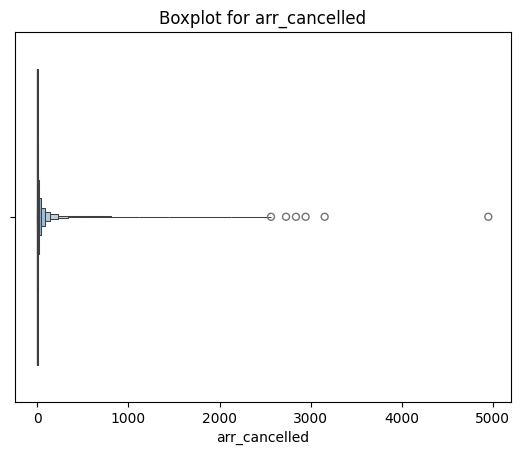

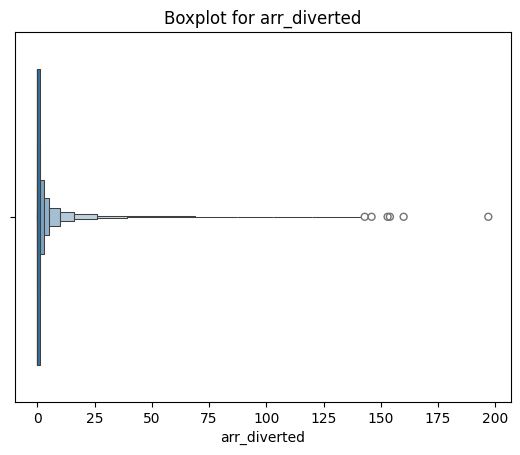

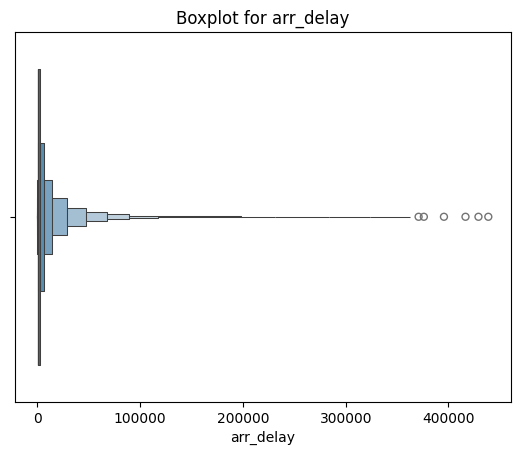

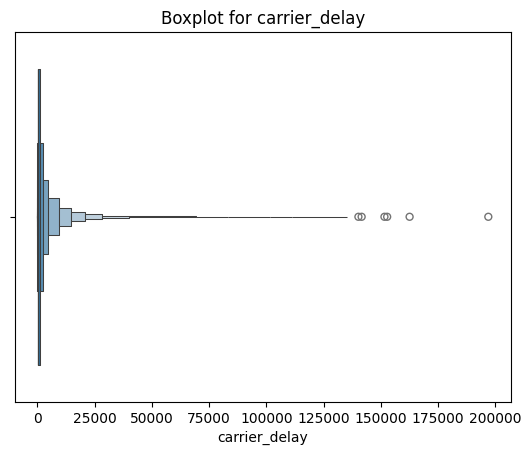

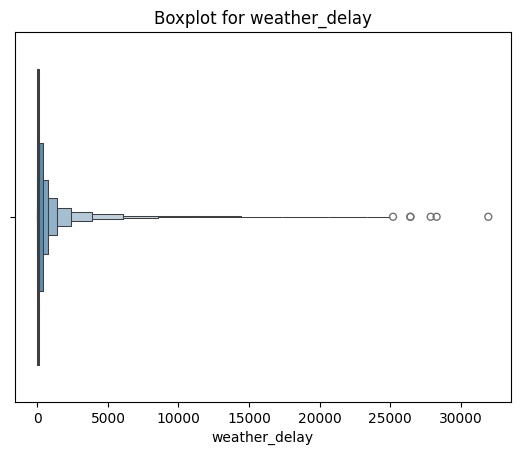

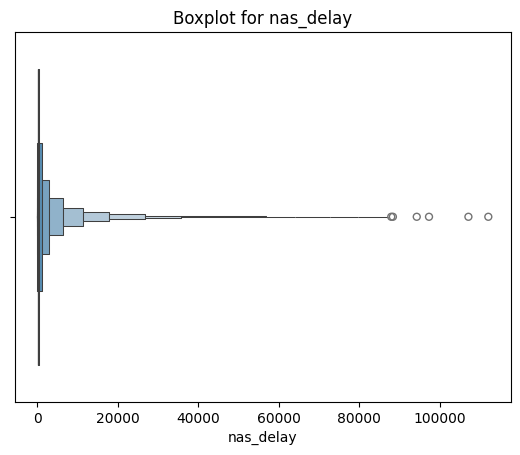

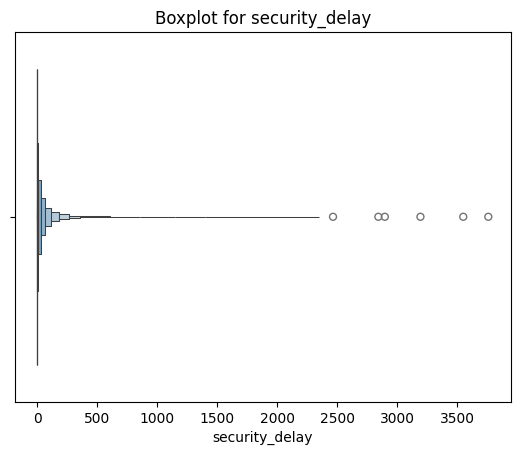

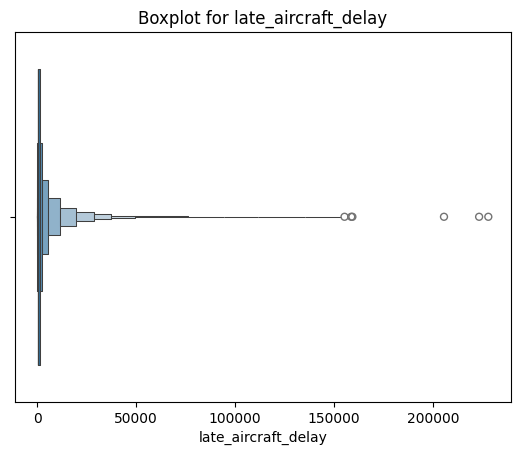

In [20]:
boxenplot(df)

In [17]:
def outliers_iqr(df: pd.DataFrame):
    before_df = df.copy()
    numeric_cols = before_df.select_dtypes(include=[np.number]).columns
    outlier_summary = []

    for col in numeric_cols:
        q1 = before_df[col].quantile(0.25)
        q3 = before_df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        before_count = ((before_df[col] < lower) | (before_df[col] > upper)).sum()
        before_df[col] = before_df[col].clip(lower=lower, upper=upper)
        after_count = ((before_df[col] < lower) | (before_df[col] > upper)).sum()

        if before_count > 0:
            outlier_summary.append({
                'column': col,
                'outliers_before': int(before_count),
                'outliers_after': int(after_count),
                'lower_bound': lower,
                'upper_bound': upper
            })

    summary_df = pd.DataFrame(outlier_summary).sort_values('outliers_before', ascending=False) if outlier_summary else pd.DataFrame()
    return before_df, summary_df

In [18]:
df_eda, outlier_report = outliers_iqr(df)
print('Outlier  summary:')
print((outlier_report))

Outlier  summary:
                 column  outliers_before  outliers_after  lower_bound  \
12            nas_delay            22295               0   -635.00000   
11        weather_delay            22171               0   -220.50000   
0           arr_flights            21570               0   -251.50000   
13       security_delay            21488               0      0.00000   
5           security_ct            21478               0      0.00000   
4                nas_ct            21368               0    -15.16625   
6      late_aircraft_ct            21313               0    -19.92500   
14  late_aircraft_delay            21276               0  -1450.50000   
9             arr_delay            21022               0  -3511.00000   
1             arr_del15            20617               0    -57.00000   
7         arr_cancelled            20554               0     -6.00000   
2            carrier_ct            19794               0    -20.64000   
10        carrier_delay          

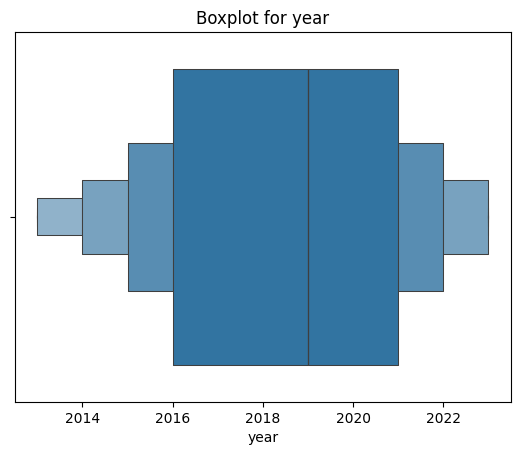

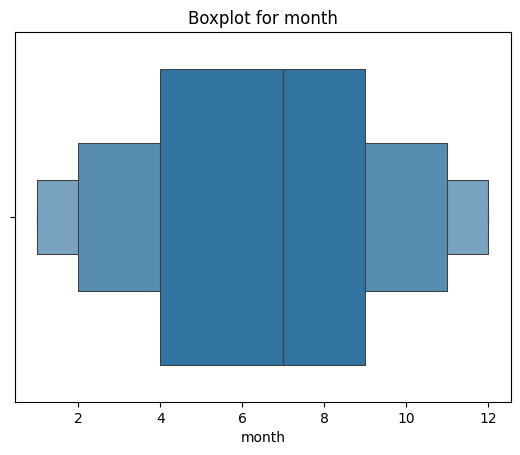

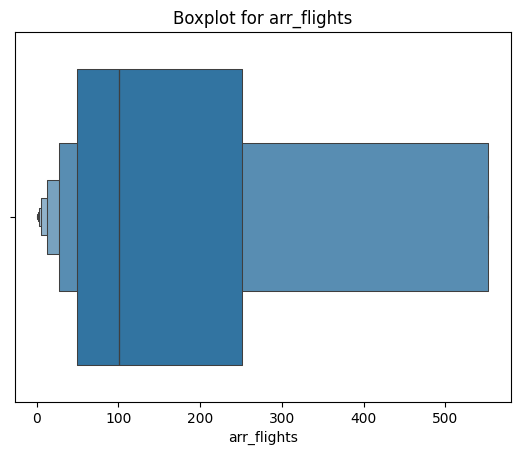

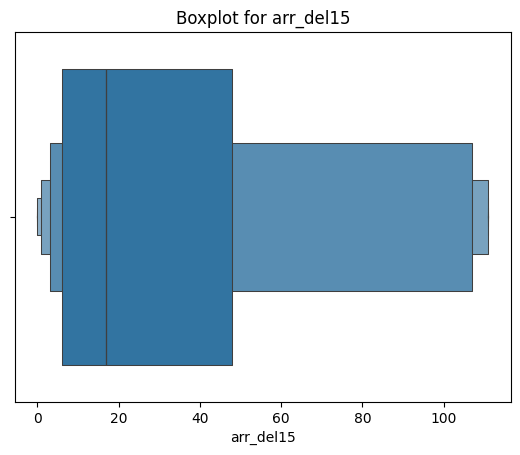

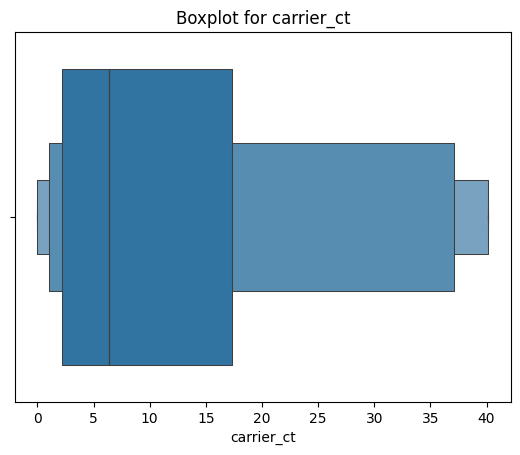

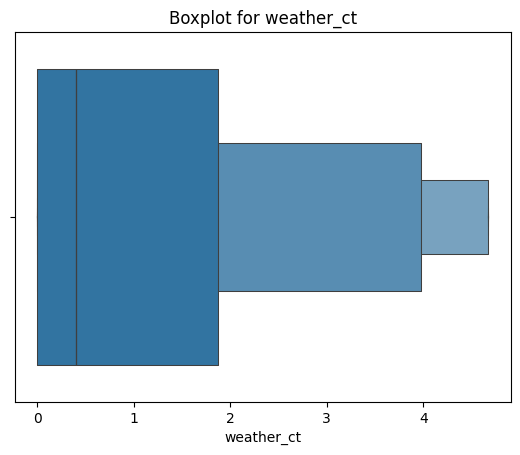

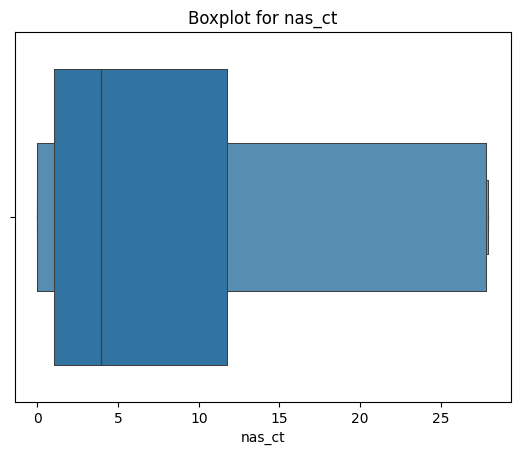

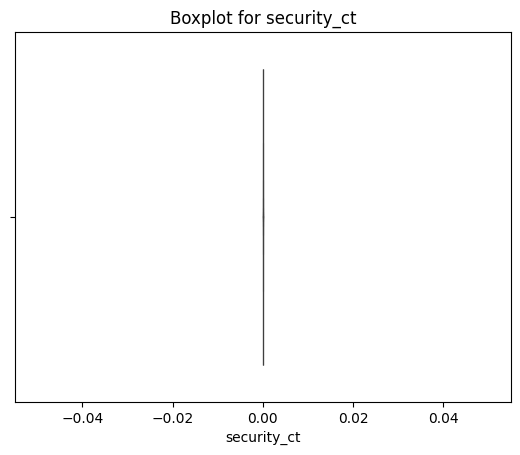

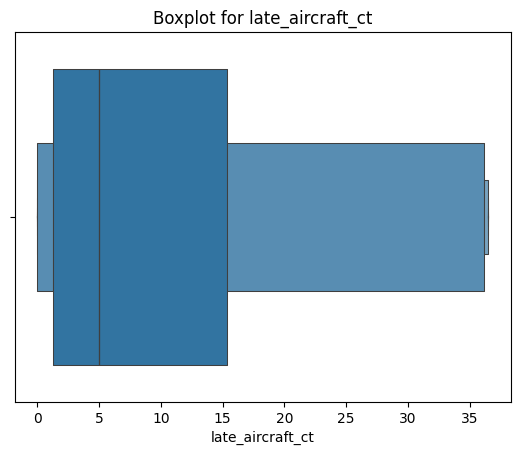

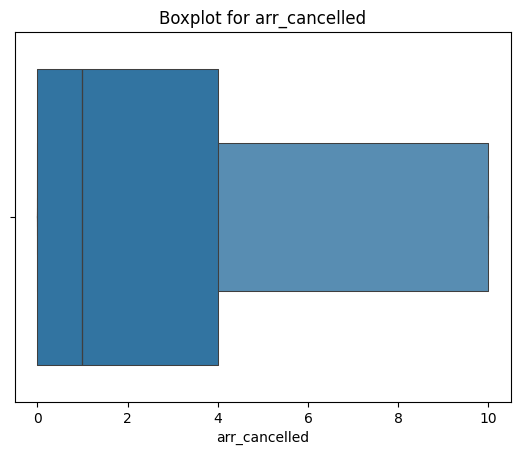

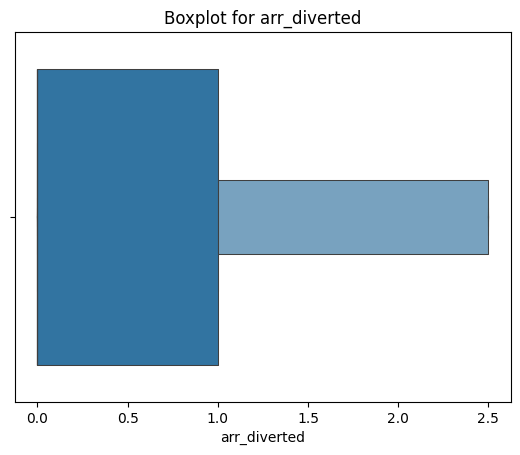

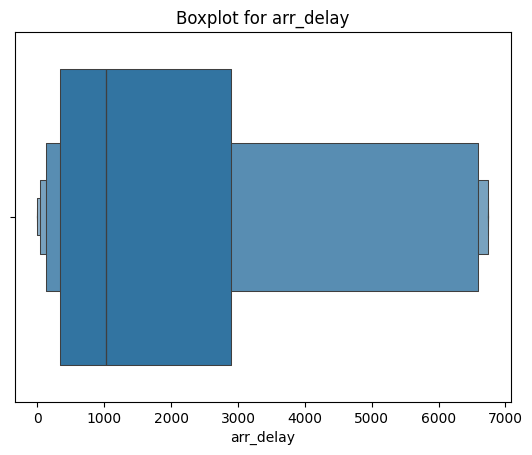

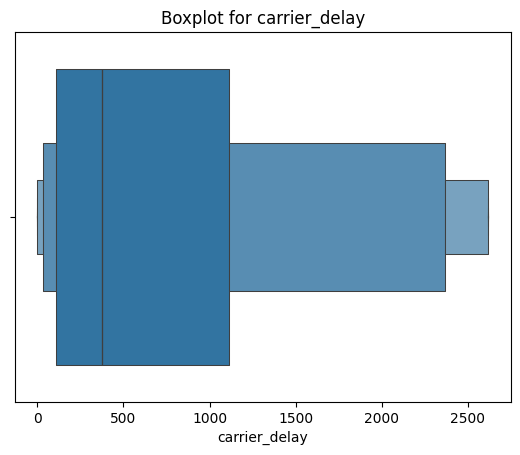

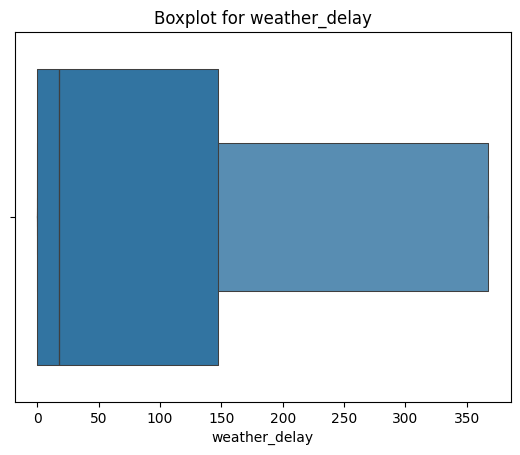

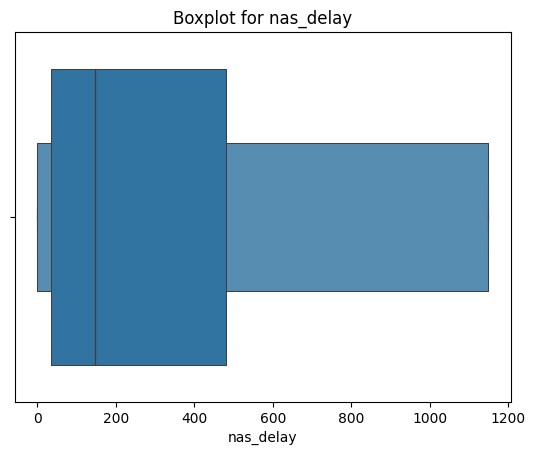

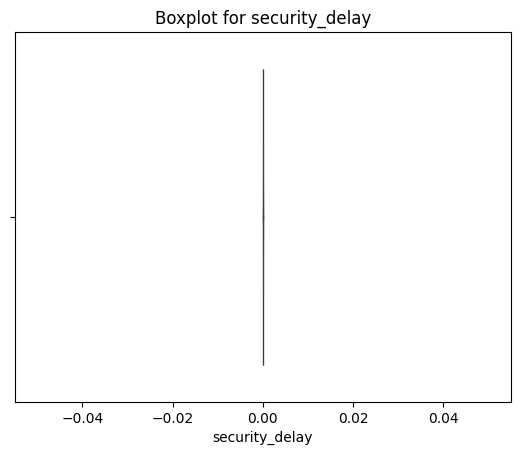

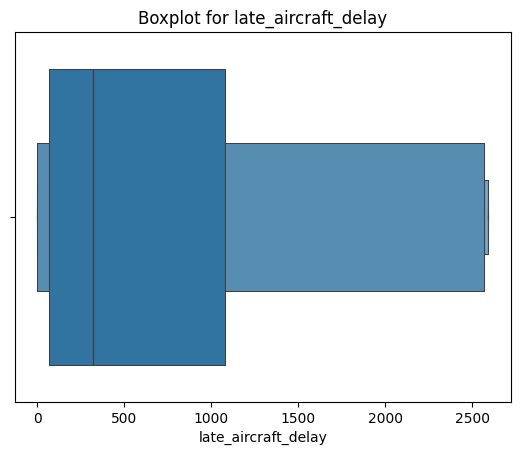

In [23]:
boxenplot(df_eda)

In [24]:
print(type(df_eda))

<class 'pandas.core.frame.DataFrame'>


In [26]:
def histogram(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        sns.histplot(df[col], kde=True, color='lightblue')
        plt.title(f"Histogram for {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

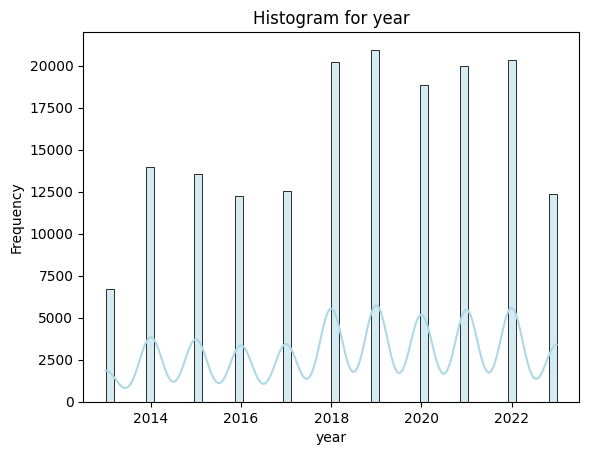

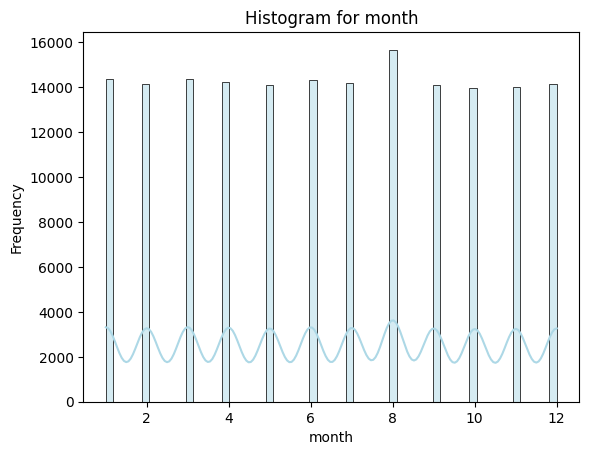

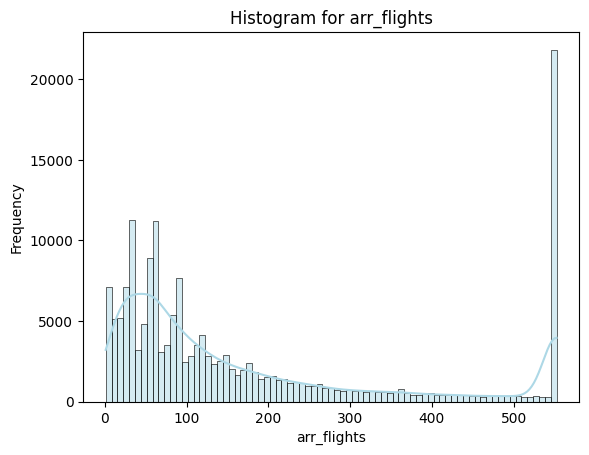

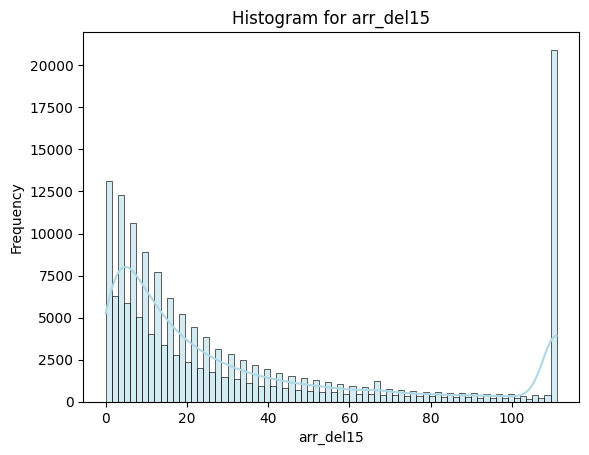

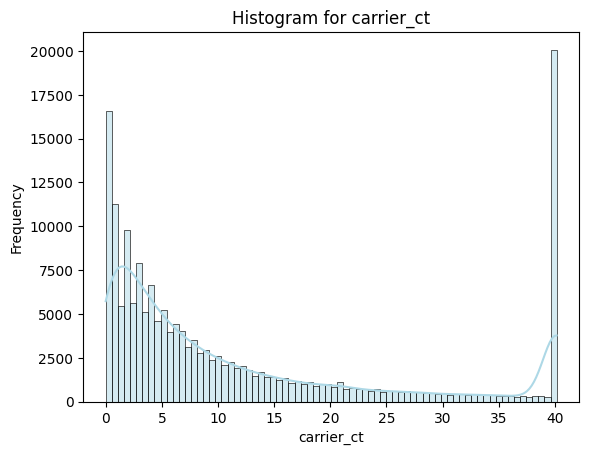

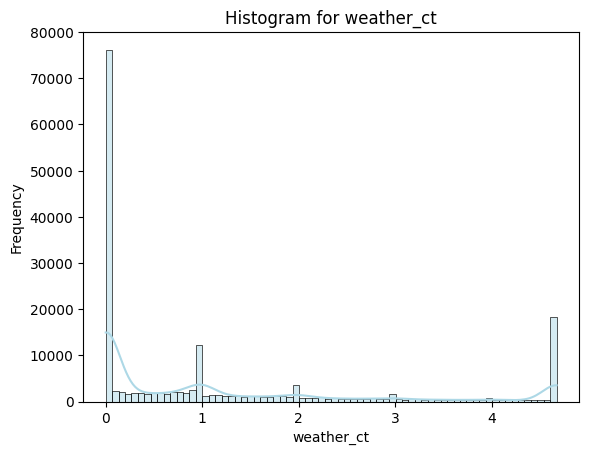

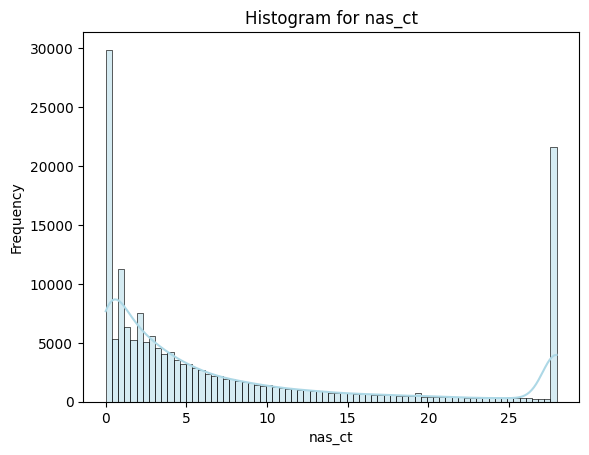

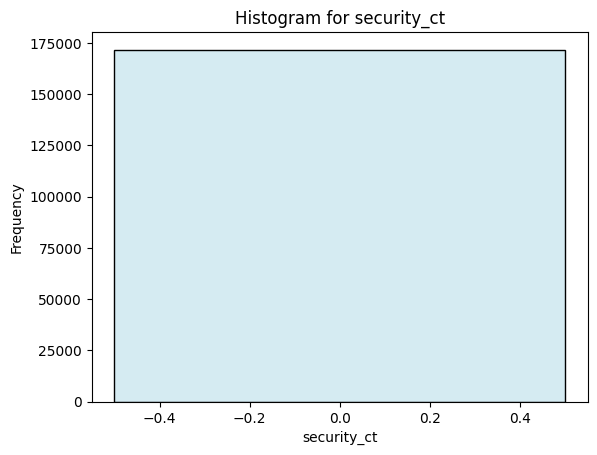

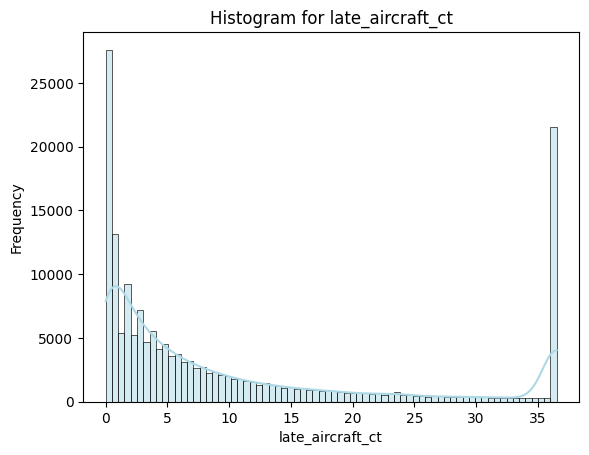

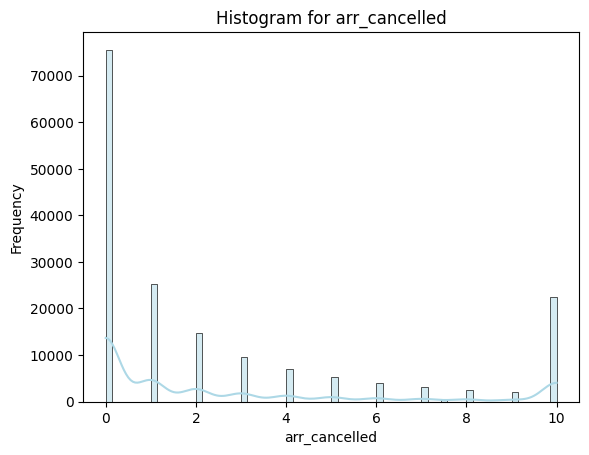

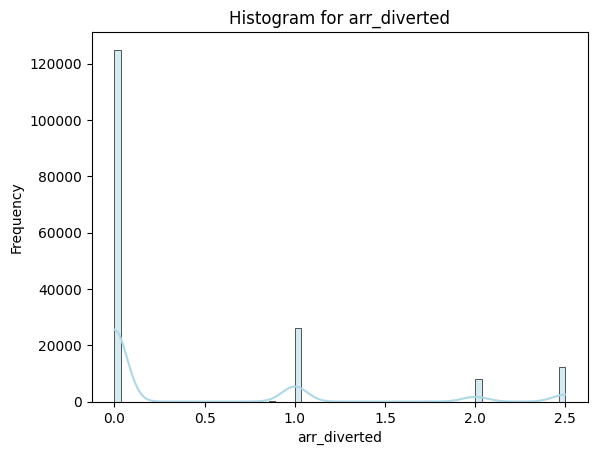

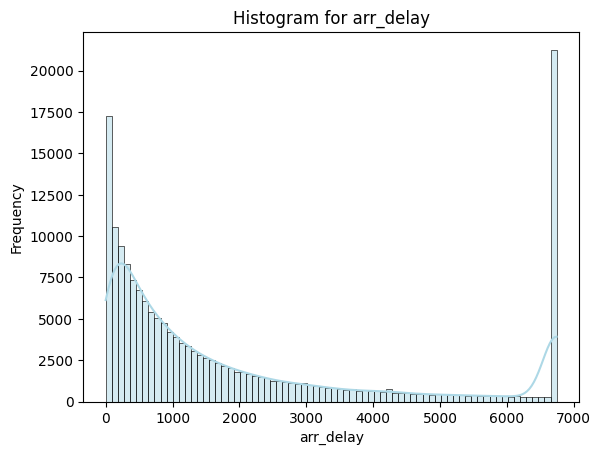

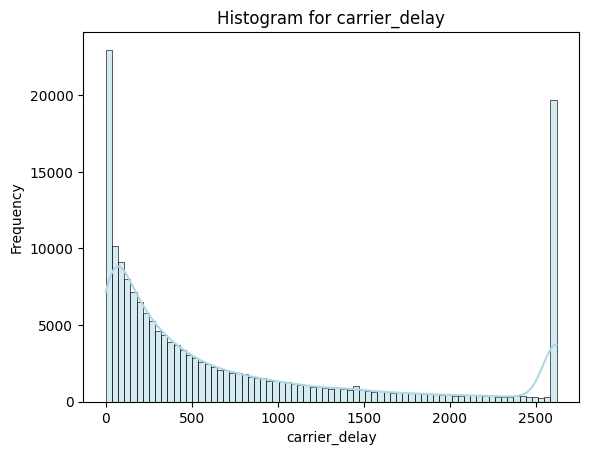

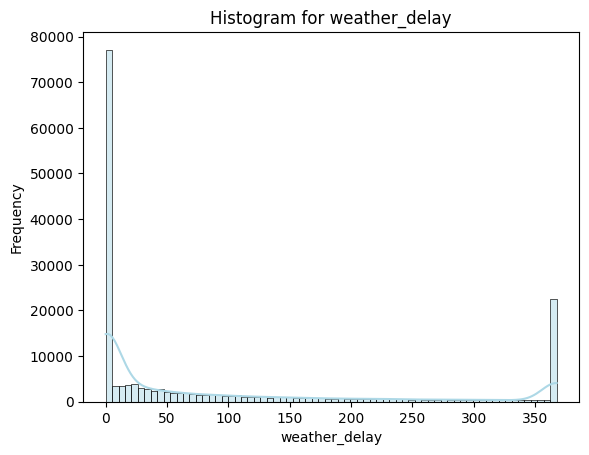

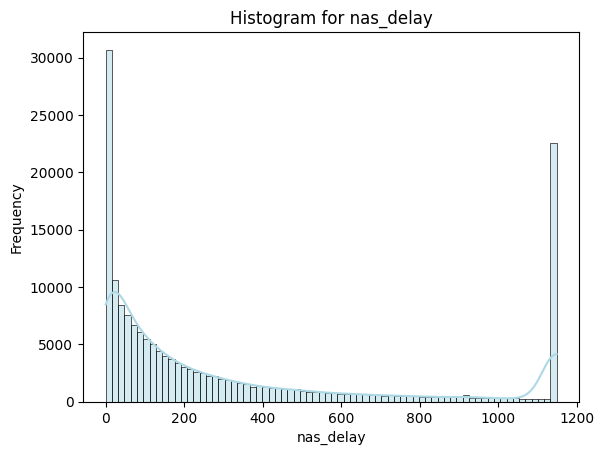

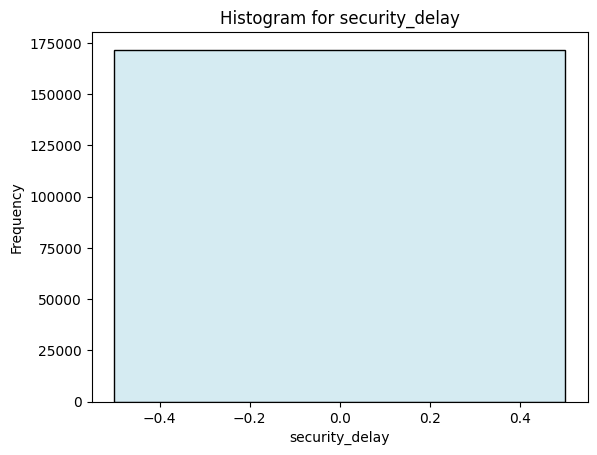

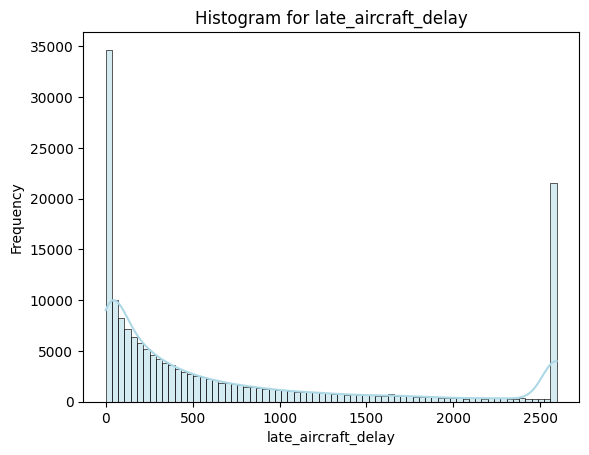

In [27]:
histogram(df_eda)

In [28]:
def scaled_data(df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns 
    excluded = numeric_cols.drop(['year', 'month'])
    df[excluded] = scaler.fit_transform(df[excluded])
    return df

In [29]:
scaled_df = scaled_data(df_eda)
print(scaled_df.head())

   year  month carrier       carrier_name airport  \
0  2023      8      9E  Endeavor Air Inc.     ABE   
1  2023      8      9E  Endeavor Air Inc.     ABY   
2  2023      8      9E  Endeavor Air Inc.     AEX   
3  2023      8      9E  Endeavor Air Inc.     AGS   
4  2023      8      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...    -0.502191  -0.560234   
1             Albany, GA: Southwest Georgia Regional    -0.652012  -0.642270   
2           Alexandria, LA: Alexandria International    -0.652012  -0.642270   
3        Augusta, GA: Augusta Regional at Bush Field    -0.629817  -0.587580   
4                   Albany, NY: Albany International    -0.485545  -0.314127   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0   -0.745740    0.266465  ...          0.0         -0.370127      -0.173482   
1   -0.767003   -0.720493  ...          

<Axes: >

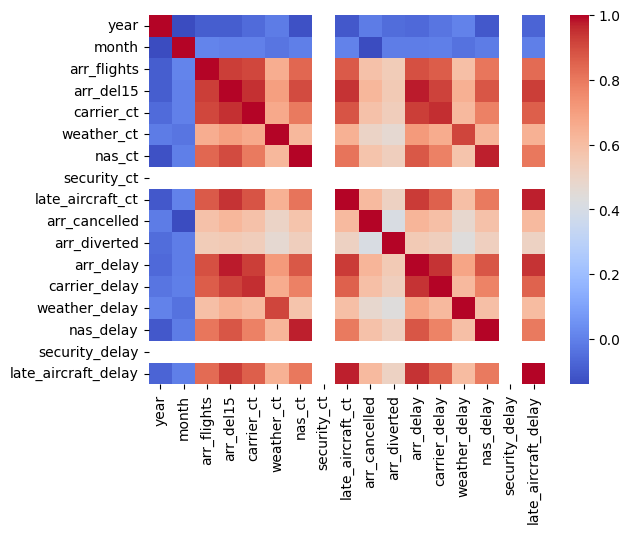

In [34]:
#Creating a correlation matrxi
numeric_df = scaled_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', fmt=".2f")

In [49]:
analysis_df = scaled_df.copy() if 'scaled_df' in globals() else (df_eda.copy() if 'df_eda' in globals() else df.copy())
numeric_cols = analysis_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = analysis_df.select_dtypes(include=['object', 'category']).columns.tolist()
delay_cols = [c for c in numeric_cols if 'delay' in c.lower()]
target_delay_col = delay_cols[0] if delay_cols else (numeric_cols[0] if numeric_cols else None)

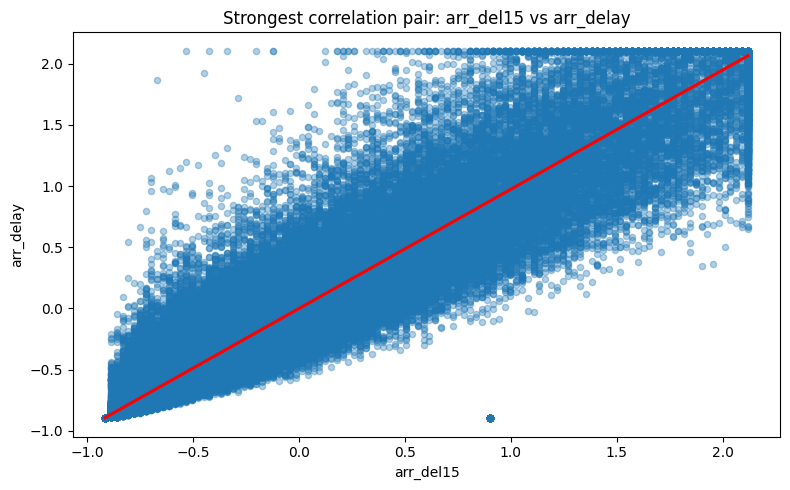

In [50]:
# Scatter + regression line for strongest correlated numeric pair
if len(numeric_cols) >= 2:
    corr_matrix = analysis_df[numeric_cols].corr().abs()
    np.fill_diagonal(corr_matrix.values, 0)
    strongest_pair = corr_matrix.stack().idxmax()
    x_col, y_col = strongest_pair

    plt.figure(figsize=(8, 5))
    sns.regplot(data=analysis_df, x=x_col, y=y_col, scatter_kws={'alpha': 0.35, 's': 20}, line_kws={'color': 'red'})
    plt.title(f'Strongest correlation pair: {x_col} vs {y_col}')
    plt.tight_layout()
    plt.show()


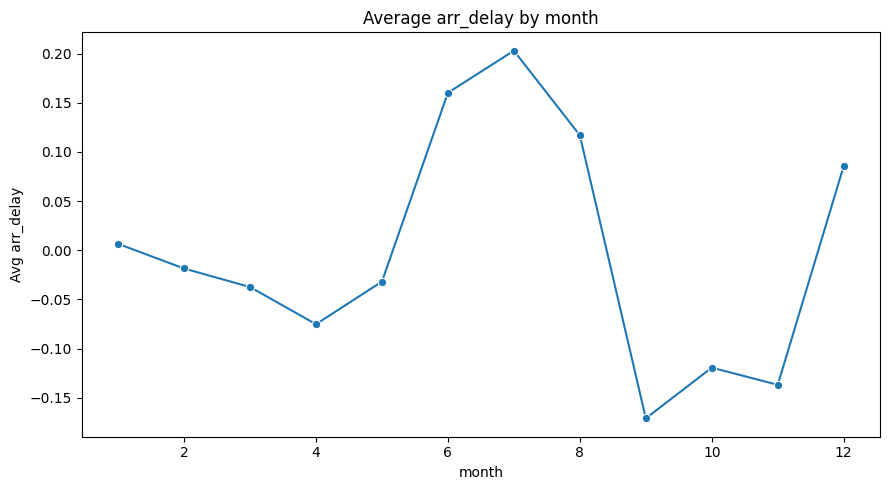

In [ ]:
# Monthly delay trend
if 'month' in analysis_df.columns and target_delay_col is not None:
    month_delay = analysis_df.groupby('month', as_index=False)[target_delay_col].mean().sort_values('month')
    plt.figure(figsize=(9, 5))
    sns.lineplot(data=month_delay, x='month', y=target_delay_col, marker='o')
    plt.title(f'Average {target_delay_col} by month')
    plt.ylabel(f'Avg {target_delay_col}')
    plt.tight_layout()
    plt.show()
else:
    print('Month trend graph skipped (required columns not found).')

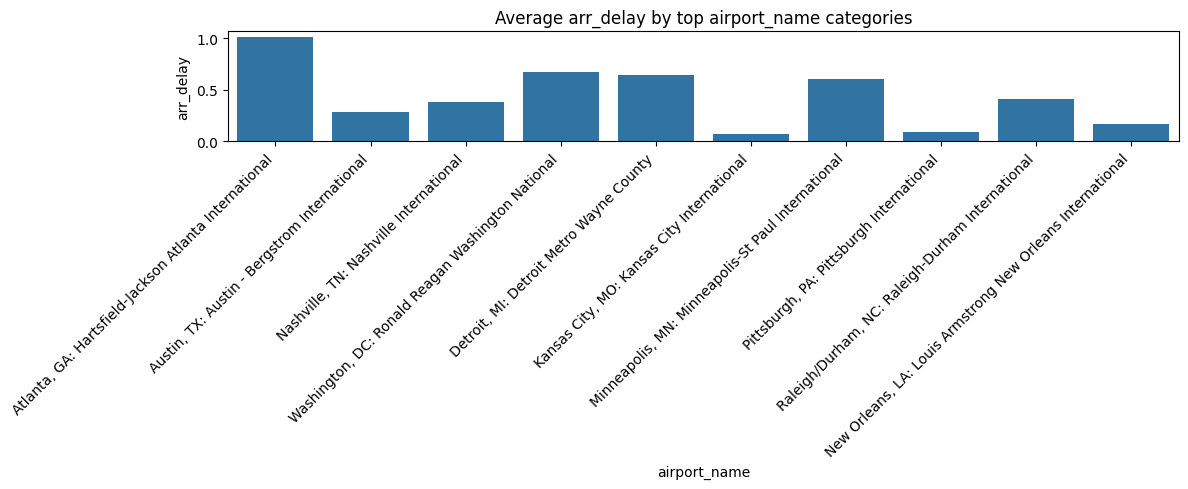

In [ ]:
# Category-wise delay comparison (top categories)
if categorical_cols and target_delay_col is not None:
    cat_col = max(categorical_cols, key=lambda c: analysis_df[c].nunique())
    top_levels = analysis_df[cat_col].value_counts().head(10).index
    temp_df = analysis_df[analysis_df[cat_col].isin(top_levels)]

    plt.figure(figsize=(12, 5))
    sns.barplot(data=temp_df, x=cat_col, y=target_delay_col, estimator=np.mean, errorbar=None)
    plt.title(f'Average {target_delay_col} by top {cat_col} categories')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print('Category comparison graph skipped (categorical or delay column not found).')

In [43]:
insights = []

if len(numeric_cols) >= 2:
    corr = analysis_df[numeric_cols].corr().abs()
    np.fill_diagonal(corr.values, 0)
    pair = corr.stack().idxmax()
    score = corr.stack().max()
    insights.append(f"Strongest numeric relationship: {pair[0]} vs {pair[1]} (|corr|={score:.3f}).")

if target_delay_col is not None:
    skew_val = analysis_df[target_delay_col].skew()
    skew_type = 'right-skewed' if skew_val > 0.5 else ('left-skewed' if skew_val < -0.5 else 'approximately symmetric')
    insights.append(f"{target_delay_col} distribution is {skew_type} (skewness={skew_val:.3f}), indicating concentration and tail behavior of delays.")

if 'month' in analysis_df.columns and target_delay_col is not None:
    month_avg = analysis_df.groupby('month')[target_delay_col].mean()
    peak_month = month_avg.idxmax()
    low_month = month_avg.idxmin()
    insights.append(f"Monthly trend: highest average {target_delay_col} in month {peak_month}, lowest in month {low_month}.")

if categorical_cols and target_delay_col is not None:
    cat_col = max(categorical_cols, key=lambda c: analysis_df[c].nunique())
    cat_avg = analysis_df.groupby(cat_col)[target_delay_col].mean().sort_values(ascending=False)
    top_cat = cat_avg.index[0]
    bot_cat = cat_avg.index[-1]
    insights.append(f"Category effect ({cat_col}): highest avg {target_delay_col} in '{top_cat}', lowest in '{bot_cat}'.")

print('Insights:')
for i, item in enumerate(insights, 1):
    print(f'{i}. {item}')

Insights:
1. Strongest numeric relationship: arr_del15 vs arr_delay (|corr|=0.974).
2. arr_delay distribution is right-skewed (skewness=1.176), indicating concentration and tail behavior of delays.
3. Monthly trend: highest average arr_delay in month 7, lowest in month 9.
4. Category effect (airport_name): highest avg arr_delay in 'Sanford, FL: Orlando Sanford International', lowest in 'Fort Collins/Loveland, CO: Northern Colorado Regional'.
